# **TUTORIAL PT. 1**

Se instalan las librerías

In [1]:
#!pip install pandas
#!pip install pandas-datareader
#!pip install matplotlib
#!pip install beautifulsoup4
#!pip install scikit-learn


Se importan las librerías

In [2]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web
import numpy as np
from scipy import stats
from sklearn import linear_model
plt.style.use('ggplot')
figsize = (15, 8)

Se importan los datos

In [3]:
#s_and_p_500.to_csv('s_and_p_500.csv') #convertir a csv
#dow_30.to_csv('dow_30.csv')
#nasdaq.to_csv('nasdaq.csv')
#s_and_p_500 = pd.read_csv('s_and_p_500.csv', parse_dates = True, index_col = 0) #leer un csv

In [4]:
start = dt.datetime(2000,1,1)
end = dt.datetime(2019,8,8)

s_and_p_500 = web.DataReader('^GSPC', 'yahoo', start, end)
dow_30 = web.DataReader('^DJI', 'yahoo', start, end)
nasdaq = web.DataReader('^IXIC', 'yahoo', start, end)

#s_and_p_500 = pd.read_csv('s_and_p_500.csv', parse_dates = True, index_col = 0) #leer un csv
#dow_30 = pd.read_csv('dow_30.csv', parse_dates = True, index_col = 0) #leer un csv
#nasdaq = pd.read_csv('nasdaq.csv', parse_dates = True, index_col = 0) #leer un csv

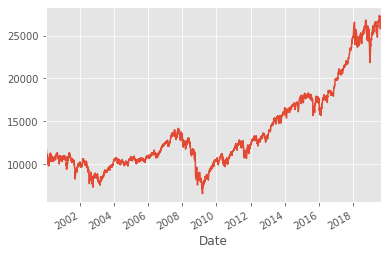

In [5]:
dow_30['Open'].plot()

Se eliminan las filas que no tengan datos

In [6]:
s_and_p_500 = s_and_p_500.dropna()
dow_30 = dow_30.dropna()
nasdaq = nasdaq.dropna()

In [7]:
#s_and_p_500.to_csv('CLEAN_s_and_p_500.csv') #convertir a csv
#dow_30.to_csv('CLEAN_dow_30.csv')
#nasdaq.to_csv('CLEAN_nasdaq.csv')

In [8]:
dow_30['High_lastDay'] = dow_30['High']
dow_30['Low_lastDay'] = dow_30['Low'] 
dow_30['Open_lastDay'] = dow_30['Open'] 
dow_30['Close_lastDay']= dow_30['Close'] 
dow_30['Volume_lastDay'] = dow_30['Volume'] 
dow_30['Adj Close_lastDay'] = dow_30['Adj Close']


In [10]:
dow_30

,High,Low,Open,Close,Volume,Adj Close,High_lastDay,Low_lastDay,Open_lastDay,Close_lastDay,Volume_lastDay,Adj Close_lastDay
Date,,,,,,,,,,,,
2000-01-03,11522.009766,11305.690430,11501.849609,11357.509766,169750000,11357.509766,11522.009766,11305.690430,11501.849609,11357.509766,169750000,11357.509766
2000-01-04,11350.059570,10986.450195,11349.750000,10997.929688,178420000,10997.929688,11522.009766,11305.690430,11501.849609,11357.509766,169750000,11357.509766
2000-01-05,11215.099609,10938.669922,10989.370117,11122.650391,203190000,11122.650391,11350.059570,10986.450195,11349.750000,10997.929688,178420000,10997.929688
2000-01-06,11313.450195,11098.450195,11113.370117,11253.259766,176550000,11253.259766,11215.099609,10938.669922,10989.370117,11122.650391,203190000,11122.650391
2000-01-07,11528.139648,11239.919922,11247.059570,11522.559570,184900000,11522.559570,11313.450195,11098.450195,11113.370117,11253.259766,176550000,11253.259766
2000-01-10,11638.280273,11532.480469,11532.480469,11572.200195,168180000,11572.200195,11528.139648,11239.919922,11247.059570,11522.559570,184900000,11522.559570
2000-01-11,11663.099609,11502.700195,11568.469727,11511.080078,177300000,11511.080078,11638.280273,11532.480469,11532.480469,11572.200195,168180000,11572.200195
2000-01-12,11612.530273,11505.179688,11506.730469,11551.099609,194060000,11551.099609,11663.099609,11502.700195,11568.469727,11511.080078,177300000,11511.080078
2000-01-13,11656.580078,11524.110352,11558.240234,11582.429688,174910000,11582.429688,11612.530273,11505.179688,11506.730469,11551.099609,194060000,11551.099609


In [ ]:
for i in range(0,4931):
    dow_30['High_lastDay'].iloc[i+1] = dow_30['High'].iloc[i] 
    dow_30['Low_lastDay'].iloc[i+1] = dow_30['Low'].iloc[i] 
    dow_30['Open_lastDay'].iloc[i+1] = dow_30['Open'].iloc[i] 
    dow_30['Close_lastDay'].iloc[i+1]= dow_30['Close'].iloc[i] 
    dow_30['Volume_lastDay'].iloc[i+1] = dow_30['Volume'].iloc[i] 
    dow_30['Adj Close_lastDay'].iloc[i+1] = dow_30['Adj Close'].iloc[i]

In [ ]:
s_and_p_500['High_lastDay'] = s_and_p_500['High']
s_and_p_500['Low_lastDay'] = s_and_p_500['Low'] 
s_and_p_500['Open_lastDay'] = s_and_p_500['Open'] 
s_and_p_500['Close_lastDay']= s_and_p_500['Close'] 
s_and_p_500['Volume_lastDay'] = s_and_p_500['Volume'] 
s_and_p_500['Adj Close_lastDay'] = s_and_p_500['Adj Close']

In [ ]:
for i in range(0,4931):
    s_and_p_500['High_lastDay'].iloc[i+1] = s_and_p_500['High'].iloc[i] 
    s_and_p_500['Low_lastDay'].iloc[i+1] = s_and_p_500['Low'].iloc[i] 
    s_and_p_500['Open_lastDay'].iloc[i+1] = s_and_p_500['Open'].iloc[i] 
    s_and_p_500['Close_lastDay'].iloc[i+1]= s_and_p_500['Close'].iloc[i] 
    s_and_p_500['Volume_lastDay'].iloc[i+1] = s_and_p_500['Volume'].iloc[i] 
    s_and_p_500['Adj Close_lastDay'].iloc[i+1] = s_and_p_500['Adj Close'].iloc[i]

In [ ]:
nasdaq['High_lastDay'] = nasdaq['High']
nasdaq['Low_lastDay'] = nasdaq['Low'] 
nasdaq['Open_lastDay'] = nasdaq['Open'] 
nasdaq['Close_lastDay']= nasdaq['Close'] 
nasdaq['Volume_lastDay'] = nasdaq['Volume'] 
nasdaq['Adj Close_lastDay'] = nasdaq['Adj Close']

In [ ]:
for i in range(0,4931):
    nasdaq['High_lastDay'].iloc[i+1] = nasdaq['High'].iloc[i] 
    nasdaq['Low_lastDay'].iloc[i+1] = nasdaq['Low'].iloc[i] 
    nasdaq['Open_lastDay'].iloc[i+1] = nasdaq['Open'].iloc[i] 
    nasdaq['Close_lastDay'].iloc[i+1]= nasdaq['Close'].iloc[i] 
    nasdaq['Volume_lastDay'].iloc[i+1] = nasdaq['Volume'].iloc[i] 
    nasdaq['Adj Close_lastDay'].iloc[i+1] = nasdaq['Adj Close'].iloc[i] 


In [ ]:
nasdaq

In [ ]:
dow_30

In [ ]:
s_and_p_500

In [ ]:
s_and_p_500.to_excel('s_and_p_500.xlsx') #convertir a Excel
dow_30.to_excel('dow_30.xlsx')
nasdaq.to_excel('nasdaq.xlsx')